# House prices predictions

We are going to train model by using Linear Regression. This model is expected to predict house price based on number of features that I'm going to pass him.

## Loading the data

In [133]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
%matplotlib inline

In [134]:
sales = pd.read_csv("./home_data.csv")
sales.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


## Performing the tasks

By the assignment, I needed to find the zipcode which has the maximum average price

In [135]:
sales[["zipcode", "price"]].groupby("zipcode").mean().sort_values("price", ascending=False).head(1)

,price
zipcode,
98039,2160606.6


Next task is to find what fraction of all houses have sqft_living in the range 2000-4000

In [136]:
house_range = sales[(2000 < sales["sqft_living"]) & (sales["sqft_living"] <= 4000)]

len(house_range) / len(sales)

0.42187572294452413

## Building simple model

Now that tasks are done, let's try building model based on just square foot related to the house price and then adding much more features!

But before that, let's split our data

In [137]:
train_set, test_set = train_test_split(sales, test_size=0.2)

### Single feature

Let's scatter the data we got

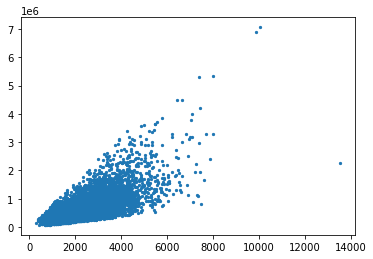

In [138]:
plt.scatter(x=train_set["sqft_living"], y=train_set["price"], s=5)

plt.show()

We observe, that the square foot areas' are hugely spread. Using just one single feature for this case couldn't be enough, but let's check by ourselves

In [139]:
features = ["sqft_living"]

simple_model = LinearRegression().fit(train_set[features], train_set["price"])

Now let's try to plot our hypothesis and calculate accuracy

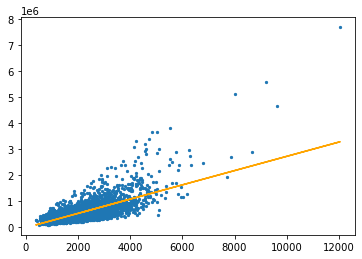

The accuracy is: 0.518563


In [140]:
predictions = simple_model.predict(test_set[features])

plt.scatter(x=test_set["sqft_living"], y=test_set["price"], s=5)
plt.plot(test_set["sqft_living"], predictions, color="orange")
plt.show()

print("The accuracy is: %f" % simple_model.score(test_set[features], test_set["price"]))

As expected, the accuracy is pretty poor, let's try adding new features

### More features

There's no way I can imagine visualizing 8 dimmensions (or at least for now), so let's stick with the numbers

In [141]:
features = ["sqft_lot", "bedrooms", "bathrooms", "sqft_living", "floors", "zipcode"]

In [142]:
middle_model = LinearRegression().fit(train_set[features], train_set["price"])

In [143]:
predictions = middle_model.predict(test_set[features])

print("The accuracy is: %f" % middle_model.score(test_set[features], test_set["price"]))

The accuracy is: 0.543459


### Advanced features

Now let's try using much more from the data

In [144]:
advanced_features = [
'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode',
'condition', # condition of house				
'grade', # measure of quality of construction				
'waterfront', # waterfront property				
'view', # type of view				
'sqft_above', # square feet above ground				
'sqft_basement', # square feet in basement				
'yr_built', # the year built				
'yr_renovated', # the year renovated				
'lat', 'long', # the lat-long of the parcel				
'sqft_living15', # average sq.ft. of 15 nearest neighbors 				
'sqft_lot15', # average lot size of 15 nearest neighbors 
]

In [145]:
advanced_model = LinearRegression().fit(train_set[advanced_features], train_set["price"])

In [146]:
predictions = advanced_model.predict(test_set[advanced_features])

print("The accuracy is: %f" % advanced_model.score(test_set[advanced_features], test_set["price"]))

The accuracy is: 0.692375


## Summary

Though accuracy is not high enough, the assignment was passed. For now it's a good result for such dataset (it could be better, but that's in the future)